In [1]:
import yfinance as yf
msft = yf.Ticker("MSFT")

In [2]:
# period: periode visée jusqu'à la date d'aujourd'hui (1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max)
df_historique_msft = msft.history(period="max") # Chercher l'historique des prix de l'action
df_historique_msft.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.061613,0.064903,0.056110,0.061613,1031788800,0.0,0.0
1986-03-14,0.063764,0.064903,0.061613,0.063764,308160000,0.0,0.0
1986-03-17,0.063761,0.065472,0.063761,0.064903,133171200,0.0,0.0
1986-03-18,0.063258,0.065472,0.062689,0.063258,66470400,0.0,0.0
1986-03-19,0.063212,0.063764,0.061613,0.062119,47894400,0.0,0.0


In [3]:
df_historique_msft.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-12-06,323.950012,327.450012,319.230011,326.190002,30032556,0.0,0.0
2021-12-07,331.640015,335.799988,330.100006,334.920013,31021936,0.0,0.0
2021-12-08,335.309998,335.500000,330.799988,334.970001,24760988,0.0,0.0
2021-12-09,334.410004,336.489014,332.119995,333.100006,21561374,0.0,0.0
2021-12-10,334.980011,343.000000,334.790009,342.540009,36582109,0.0,0.0


In [4]:
df_historique_msft.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,9012.000000,9012.000000,9012.000000,9012.000000,9.012000e+03,9012.000000,9012.000000
mean,34.187107,34.534565,33.835448,34.200676,5.854638e+07,0.002433,0.001886
std,55.259324,55.766366,54.750647,55.297190,3.887327e+07,0.041859,0.060026
min,0.057165,0.058324,0.056110,0.057185,0.000000e+00,0.000000,0.000000
25%,2.505403,2.537939,2.493613,2.511977,3.454292e+07,0.000000,0.000000
50%,18.870957,19.081123,18.642922,18.876850,5.181120e+07,0.000000,0.000000
75%,28.696676,29.066433,28.332179,28.743847,7.212240e+07,0.000000,0.000000
max,344.619995,349.670013,342.200012,343.109985,1.031789e+09,3.000000,2.000000


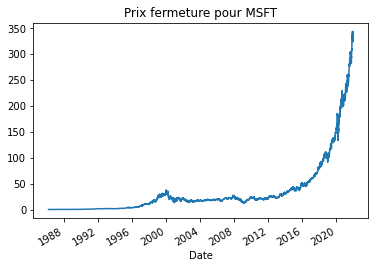

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
# Afficher le graphique des prix de fermeture
df_historique_msft['Close'].plot()
plt.title("Prix fermeture pour MSFT")
plt.show()

<AxesSubplot:xlabel='Date'>

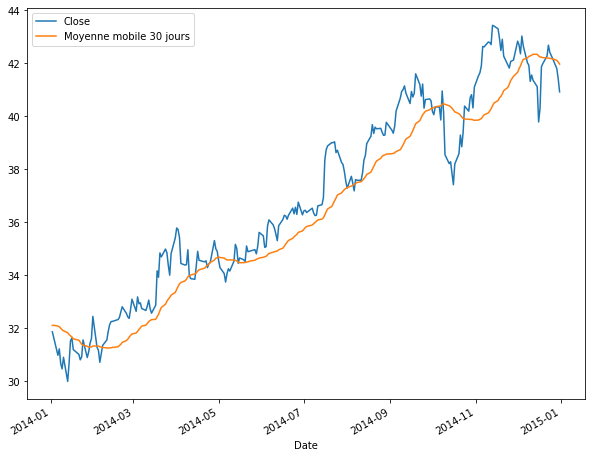

In [6]:
# Moyenne mobile 30 jours
df_historique_msft['Moyenne mobile 30 jours'] = df_historique_msft['Close'].rolling(window=30).mean()

# Graphique 
df_historique_msft['2014-01-01': '2015-01-01'][['Close', 'Moyenne mobile 30 jours']].plot(figsize=(10,8))

In [7]:
df_historique_msft['Log retours Close'] = np.log(df_historique_msft['Close']/df_historique_msft['Close'].shift(1))

NameError: name 'np' is not defined

In [ ]:
df_historique_msft['Log retours Close'].plot()

In [ ]:
df_historique_msft_2014_close = df_historique_msft['2014-01-01': '2015-01-01']['Close']
df_historique_msft_2014_close.plot()
# rolling() retourne un objet Rolling qui permet des opérations d'agrégation sur une fenêtre de données
# par défaut chacun des éléments est pondéré également
fenetre_10=df_historique_msft['2014-01-01': '2015-01-01']['Close'].rolling(window = 10)

In [ ]:
# Prend la moyenne mobile de 10 valeurs à la fois
fenetre_10.mean().plot()

In [8]:
from pandas.plotting import lag_plot
plt.figure()
# Affiche Yt+lag vs Yt
# Si lag=1 affiche serie[:-1] vs. serie[1:]
lag_plot(df_historique_msft_2014_close,lag=1)

NameError: name 'df_historique_msft_2014_close' is not defined

<Figure size 432x288 with 0 Axes>

In [9]:
lag_plot(df_historique_msft_2014_close, lag=5)

NameError: name 'df_historique_msft_2014_close' is not defined

In [10]:
from pandas.plotting import autocorrelation_plot
plt.figure()
# La ligne pleine indique l'intervalle de confiance à 95%
# La ligne pointillée indique l'intervalle de confiance à 99%
autocorrelation_plot(df_historique_msft_2014_close)

NameError: name 'df_historique_msft_2014_close' is not defined

<Figure size 432x288 with 0 Axes>

In [11]:
# plot_acf() de statsmodel produit un graphique similaire
# le cône est un intervalle de confiance à 95%
from statsmodels.graphics.tsaplots import plot_acf
# Plot the acf function on the ts_data_load set
plot_acf(df_historique_msft_2014_close)
plt.show()

NameError: name 'df_historique_msft_2014_close' is not defined

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
# Autocorrélation partielle : corrélation après avoir enlevé l'effet des données plus récentes par rapport à cible
plot_pacf(df_historique_msft_2014_close, lags=20)
plt.show()

In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)
        plt.tight_layout()
    return 

In [ ]:
df_historique_msft_2014_close.plot()
# Première différence proche stationnaire
tsplot(np.diff(df_historique_msft_2014_close), lags=30)

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error

In [13]:
X=df_historique_msft_2014_close.values
train, test = X[1:round(len(X)*0.8)], X[round(len(X)*0.8):]

NameError: name 'df_historique_msft_2014_close' is not defined

In [ ]:
plt.plot(train)

In [14]:
plt.plot(test)

NameError: name 'test' is not defined

In [15]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# train autoregression
model = AutoReg(train, lags=1)
model_fit = model.fit()
print(model_fit.summary())
print('Coefficients: %s' % model_fit.params)

NameError: name 'train' is not defined

In [16]:
model_fit.plot_predict(0,250,dynamic=False)

NameError: name 'model_fit' is not defined

In [17]:
model_fit.plot_diagnostics()

NameError: name 'model_fit' is not defined

In [18]:
predictions_MSFT_2014 = model_fit.predict(start=0, end=len(train)+len(test)-1,dynamic=True)

NameError: name 'model_fit' is not defined

In [19]:
len(predictions_MSFT_2014)

NameError: name 'predictions_MSFT_2014' is not defined

In [20]:
len(train)

NameError: name 'train' is not defined

In [21]:
len(np.concatenate((train,test)))

NameError: name 'train' is not defined

In [22]:
plt.plot(np.concatenate((train,test)))
plt.plot(predictions_MSFT_2014, color='orange')
plt.show()

NameError: name 'train' is not defined

In [23]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(4,1,4))
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

NameError: name 'train' is not defined

In [24]:
preds_MA1_MSFT_2014 = model_fit.predict(start=0, end=len(train)+len(test)-1,dynamic=True)

NameError: name 'model_fit' is not defined

In [25]:
plt.plot(np.concatenate((train,test)))
plt.plot(preds_MA1_MSFT_2014, color='orange')
plt.show()

NameError: name 'train' is not defined

In [26]:
model_fit = ARIMA(train, order=(1,0,0)).fit()
print('Coefficients: %s' % model_fit.params)
preds_ARIMA_MSFT_2014 = model_fit.predict(start=0, end=len(train)+len(test)-1,dynamic=False)
plt.plot(np.concatenate((train,test)))

plt.plot(preds_ARIMA_MSFT_2014, color='orange')
plt.show()

NameError: name 'train' is not defined

In [27]:
# Fit ARIMA(p, d, q) model to SPY Returns
# pick best order and final model based on aic

best_aic = np.inf 
best_order = None
best_mdl = None

pq_rng = range(5) # [0,1,2,3,4]
d_rng = range(2) # [0,1]
for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            print(i,d,j)
            tmp_mdl = ARIMA(train, order=(i,d,j)).fit()
            tmp_aic = tmp_mdl.aic
            print(tmp_aic,tmp_mdl.aic,tmp_aic < best_aic)
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, d, j)
                print(best_order)
                best_mdl = tmp_mdl

print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))
# aic: -11518.22902 | order: (4, 0, 4)

# ARIMA model resid plot
tsplot(best_mdl.resid, lags=30)

0 0 0


NameError: name 'train' is not defined

In [28]:
# Select best lag order for MSFT returns

max_lag = 30
mdl = smt.AR(train).fit(maxlag=max_lag, ic='aic', trend='nc')
est_order = smt.AR(train).select_order(
    maxlag=max_lag, ic='aic', trend='nc')

print('best estimated lag order = {}'.format(est_order))

# best estimated lag order = 23

NameError: name 'smt' is not defined

In [29]:
lrets = np.log(train[1:]/train[:-1])

NameError: name 'train' is not defined

In [30]:
lrets

NameError: name 'lrets' is not defined

In [31]:
plt.plot(lrets)

NameError: name 'lrets' is not defined

In [32]:
X=df_historique_msft['Log retours Close'].values
train, test = X[1:round(len(X)*0.8)], X[round(len(X)*0.8):]

KeyError: 'Log retours Close'

In [33]:
len(train)

NameError: name 'train' is not defined

In [34]:
# Fit ARIMA(p, d, q) model to SPY Returns
# pick best order and final model based on aic

best_aic = np.inf 
best_order = None
best_mdl = None

pq_rng = range(5) # [0,1,2,3,4]
d_rng = range(2) # [0,1]
for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            print(i,d,j)
            tmp_mdl = ARIMA(train, order=(i,d,j)).fit()
            tmp_aic = tmp_mdl.aic
            print(tmp_aic,tmp_mdl.aic,tmp_aic < best_aic)
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, d, j)
                print(best_order)
                best_mdl = tmp_mdl

print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))
# aic: -11518.22902 | order: (4, 0, 4)

# ARIMA model resid plot
tsplot(best_mdl.resid, lags=30)

0 0 0


NameError: name 'train' is not defined

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
import seaborn as sns
import statsmodels.api as sm
import itertools
from statsmodels.tsa.arima_model import ARIMA, ARMA
import warnings
warnings.filterwarnings("ignore")

In [36]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 3)
# Generate all different combinations of p, q and q
pdq = list(itertools.product(p, d, q))

In [37]:
df=df_historique_msft['Close']

warnings.filterwarnings("ignore")
aic= []
parameters = []
for param in pdq:
  #for param in pdq:
      try:
          mod = ARIMA(df,order=param)
          results = mod.fit()
          # save results in lists
          aic.append(results.aic)
          parameters.append(param)
          #seasonal_param.append(param_seasonal)
          print('ARIMA{} - AIC:{}'.format(param, results.aic))
      except:
          continue
# find lowest aic          
index_min = min(range(len(aic)), key=aic.__getitem__)           

print('The optimal model is: ARIMA{} -AIC{}'.format(parameters[index_min], aic[index_min]))


ARIMA(0, 0, 0) - AIC:97903.25104114068
ARIMA(0, 0, 1) - AIC:85628.19677082302
ARIMA(0, 0, 2) - AIC:75338.42519336406
ARIMA(0, 1, 0) - AIC:27378.19861964764
ARIMA(0, 1, 1) - AIC:27065.473418603917
ARIMA(0, 1, 2) - AIC:27029.716302442986
ARIMA(0, 2, 0) - AIC:35178.987628079005
ARIMA(0, 2, 1) - AIC:27350.54539773902
ARIMA(0, 2, 2) - AIC:27009.96703831925
ARIMA(1, 0, 0) - AIC:27411.32192342328
ARIMA(1, 1, 0) - AIC:27036.336128455758
ARIMA(1, 1, 1) - AIC:27033.126360464314
ARIMA(1, 1, 2) - AIC:27031.459251905377
ARIMA(1, 2, 0) - AIC:31049.67329486114
ARIMA(1, 2, 1) - AIC:26984.065831770717
ARIMA(2, 0, 0) - AIC:27075.650544922242
ARIMA(2, 1, 0) - AIC:27032.00722672072
ARIMA(2, 1, 1) - AIC:27032.890651147452
ARIMA(2, 1, 2) - AIC:26869.776585584612
ARIMA(2, 2, 0) - AIC:29712.570806391726
ARIMA(2, 2, 1) - AIC:26983.12468096225
ARIMA(2, 2, 2) - AIC:26958.200026272305
The optimal model is: ARIMA(2, 1, 2) -AIC26869.776585584612


In [38]:
model = ARIMA(df, order=parameters[index_min])
model_fit = model.fit(disp=0) 
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 9011
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -13428.888
Method:                       css-mle   S.D. of innovations              1.074
Date:                Sat, 11 Dec 2021   AIC                          26869.777
Time:                        19:56:49   BIC                          26912.414
Sample:                             1   HQIC                         26884.284
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0379      0.011      3.565      0.000       0.017       0.059
ar.L1.D.Close    -1.7461      0.014   -123.546      0.000      -1.774      -1.718
ar.L2.D.Close    -0.8889      0.013    -

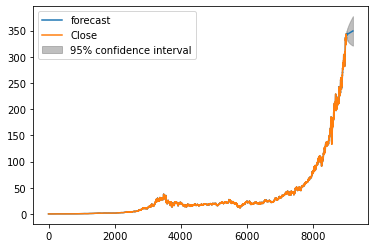

In [39]:
model_fit.plot_predict(start=2, end=len(df)+200)
plt.show()

ARIMA(0, 0, 0) - AIC:1373.7501460427604
ARIMA(0, 0, 1) - AIC:1070.8674222381273
ARIMA(0, 1, 0) - AIC:302.53937109314717
ARIMA(0, 1, 1) - AIC:304.5389955729077
ARIMA(0, 1, 2) - AIC:305.7499694902709
ARIMA(0, 2, 0) - AIC:475.00949058735847
ARIMA(0, 2, 1) - AIC:309.79631942043164
ARIMA(0, 2, 2) - AIC:311.79442354085506
ARIMA(1, 0, 0) - AIC:311.2483403716189
ARIMA(1, 0, 1) - AIC:313.22067246051955
ARIMA(1, 0, 2) - AIC:314.7648759192328
ARIMA(1, 1, 0) - AIC:304.5390349271604
ARIMA(1, 1, 1) - AIC:297.4558223235411
ARIMA(1, 1, 2) - AIC:298.82140260273565
ARIMA(1, 2, 0) - AIC:412.6489173606258
ARIMA(1, 2, 1) - AIC:311.79462813288256
ARIMA(1, 2, 2) - AIC:313.77507138515506
ARIMA(2, 0, 0) - AIC:313.2229019911018
ARIMA(2, 0, 1) - AIC:319.8890267253911
ARIMA(2, 0, 2) - AIC:323.90550859559767
ARIMA(2, 1, 0) - AIC:305.8428217442829
ARIMA(2, 1, 1) - AIC:307.2493252262404
ARIMA(2, 1, 2) - AIC:301.4549535740646
ARIMA(2, 2, 0) - AIC:375.4543474016281
ARIMA(2, 2, 1) - AIC:313.1929230535153
ARIMA(2, 2, 2)

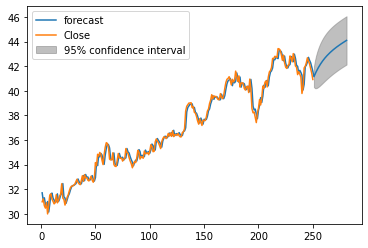

In [41]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 3)
# Generate all different combinations of p, q and q
pdq = list(itertools.product(p, d, q))
df=df_historique_msft['2014-01-01': '2015-01-01']['Close']

warnings.filterwarnings("ignore")
aic= []
parameters = []
for param in pdq:
  #for param in pdq:
      try:
          mod = ARIMA(df,order=param)
          results = mod.fit()
          # save results in lists
          aic.append(results.aic)
          parameters.append(param)
          #seasonal_param.append(param_seasonal)
          print('ARIMA{} - AIC:{}'.format(param, results.aic))
      except:
          continue
# find lowest aic          
index_min = min(range(len(aic)), key=aic.__getitem__)           

print('The optimal model is: ARIMA{} -AIC{}'.format(parameters[index_min], aic[index_min]))
model = ARIMA(df, order=parameters[index_min])
model_fit = model.fit(disp=0) 
print(model_fit.summary())

model_fit.plot_predict(start=2, end=len(df)+30)
plt.show()